# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.159641e+01     7.349923e+00
 * time: 0.004408121109008789
     1     2.842911e+01     5.562985e+00
 * time: 0.013241052627563477
     2     1.672418e+01     2.469585e+00
 * time: 0.038308143615722656
     3     1.291652e+01     2.437346e+00
 * time: 0.0578770637512207
     4     1.216331e+01     1.523652e+00
 * time: 0.07340502738952637
     5     1.201678e+01     2.279027e+00
 * time: 0.08875107765197754
     6     1.104039e+01     1.387876e+00
 * time: 0.10395097732543945
     7     1.017116e+01     1.102660e+00
 * time: 0.17710518836975098
     8     9.601936e+00     1.284052e+00
 * time: 0.19260501861572266
     9     9.198304e+00     9.641981e-01
 * time: 0.20780611038208008
    10     8.952027e+00     6.864456e-01
 * time: 0.22311019897460938
    11     8.905834e+00     1.665101e+00
 * time: 0.2345881462097168
    12     8.841751e+00     1.103863e+00
 * time: 0.24607515335083008
    13     8.741313e+00     5.700622e-01
 * time

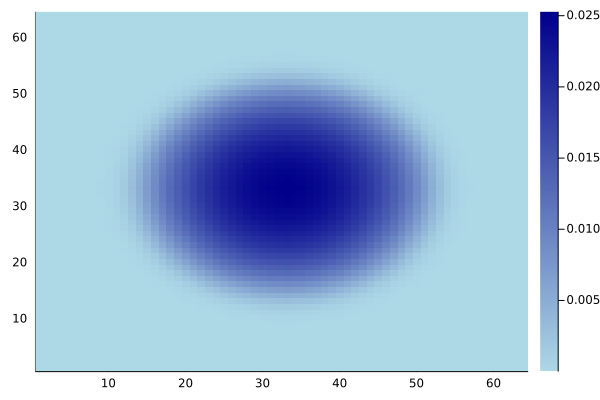

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)